In [125]:
import torch
import torchvision
import pycuda.driver as cuda
import matplotlib.pyplot as plt
import utils
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [126]:
import torchvision.transforms as transforms

In [127]:
torch.cuda.is_available()

True

In [128]:
cuda.init()

In [129]:
torch.cuda.current_device()

0

In [130]:
cuda.Device(0).name()

'Quadro M2000M'

In [131]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [132]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [133]:
transformer = transforms.Compose(
        [transforms.ToTensor() ,
        transforms.Normalize((0.5 , 0.5 , 0.5) , (0.5 , 0.5 , 0.5))])


In [134]:

trainCifarDataSet = torchvision.datasets.CIFAR10(root = "./data" , train=True , download=True , transform = transformer)

Files already downloaded and verified


In [135]:
type(trainCifarDataSet.data[0])

numpy.ndarray

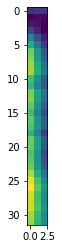

In [136]:
plt.imshow(trainCifarDataSet.data[0][0])


In [137]:
class Network(nn.Module):
    def __init__(self):
        super(Network , self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool =nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5 , 120)
        self.fc2 = nn.Linear(120 , 84)
        self.fc3 = nn.Linear(84 , 10)
        
    def forward(self , x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1 , 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [144]:
network = Network()
network.to(device)

Network(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [139]:
crit = nn.CrossEntropyLoss()
optimizer = optim.SGD(network.parameters() , lr = 0.001 , momentum = 0.9)

In [140]:
for i in network.parameters():
    print(i)

Parameter containing:
tensor([[[[ 0.0182,  0.0272, -0.0030, -0.0773, -0.1011],
          [-0.0197, -0.0254,  0.0502, -0.0094, -0.0992],
          [-0.0682,  0.0659,  0.0112, -0.1022, -0.1029],
          [ 0.0480, -0.0936, -0.0770, -0.0996,  0.0988],
          [-0.0974, -0.0029, -0.1078, -0.0666,  0.0980]],

         [[ 0.1067,  0.0572, -0.0660, -0.0741,  0.0499],
          [-0.0010, -0.0997,  0.0393, -0.1038, -0.1090],
          [-0.0675, -0.0276,  0.0921,  0.0240, -0.0058],
          [-0.0634,  0.0666,  0.0322, -0.0007, -0.0922],
          [ 0.0472,  0.0370,  0.1071,  0.0136, -0.0031]],

         [[ 0.0576,  0.0639, -0.0956, -0.0689,  0.0249],
          [ 0.0251, -0.0961, -0.0099,  0.0938, -0.0848],
          [ 0.0703, -0.0288, -0.0616,  0.0917, -0.0118],
          [ 0.0887, -0.0649, -0.0579, -0.0235, -0.1050],
          [-0.0713, -0.0465, -0.0595,  0.0513, -0.0300]]],


        [[[ 0.0373,  0.0137, -0.0996, -0.0685,  0.0389],
          [ 0.0930, -0.1025,  0.0179,  0.0888,  0.0694],
 

In [145]:
for epoch in range(2):
    running_loss = 0.0
    for i , data in enumerate(trainloader , 0):
        inputs , labels = data
        inputs, labels = data[0].to(device), data[1].to(device)
        #print(type(inputs))
        #print(labels)
        
        optimizer.zero_grad()
        
        outputs = network(inputs);
        loss = crit(outputs , labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

[1,  2000] loss: 2.305
[1,  4000] loss: 2.305
[1,  6000] loss: 2.304
[1,  8000] loss: 2.306
[1, 10000] loss: 2.305
[1, 12000] loss: 2.306
[2,  2000] loss: 2.305
[2,  4000] loss: 2.305
[2,  6000] loss: 2.304
[2,  8000] loss: 2.305
[2, 10000] loss: 2.305
[2, 12000] loss: 2.305


In [103]:
PATH = "/home/sireanuroland/cifar_net.pth"

In [108]:
stdct = network.state_dict()

In [109]:
torch.save(stdct,PATH)

In [110]:
secondNetwork = Network()

In [111]:
secondNetwork.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [112]:
datait = iter(testloader)

In [113]:
images , labels = datait.next()

In [116]:
images.shape

torch.Size([4, 3, 32, 32])

In [117]:
outputs = secondNetwork(images)

In [118]:
_ , predicted = torch.max(outputs , 1)

In [119]:
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car   car  ship


In [120]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = secondNetwork(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %
